# Projeto 2 - Houses Prices

### 1. Entendimento do Problema

##### Objetivo: Prever o preço de venda de casas usando dados tabulares

##### Variáveis: Explorar variáveis com metragem, número de quartos e localização

##### Tarefa de Machine Learning: Regressão(o preço é uma variável contínua))

### 2. Carregando e Explorando os Dados

In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np

# Carregando os dados
train = pd.read_csv(r'C:\Users\josaf\Documents\Cientista de dados\Curso\data\houses\train.csv')
test = pd.read_csv(r'C:\Users\josaf\Documents\Cientista de dados\Curso\data\houses\test.csv')

# Explorando os primeiros dados
print(train.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

### 3. Limpeza e Pré-Processamento dos Dados

In [5]:
# Verificando valores nulos
print(train.isnull().sum().sort_values(ascending=False))

# Preenchendo valores nulos
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['GarageType'] = train['GarageType'].fillna('None')
train = train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Lidando com variáveis categóricas
train = pd.get_dummies(train, drop_first=True)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64


### 4. Exploração e Análise dos Dados

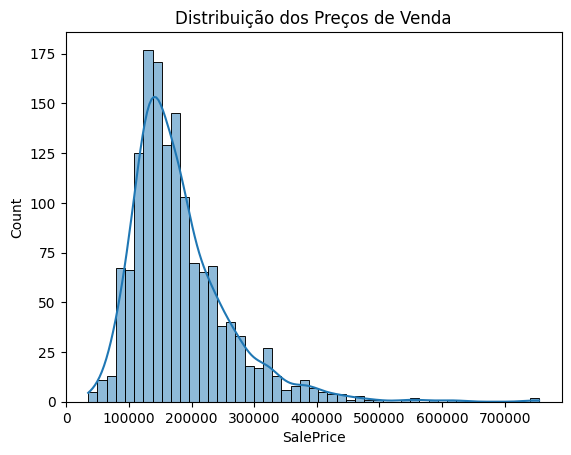

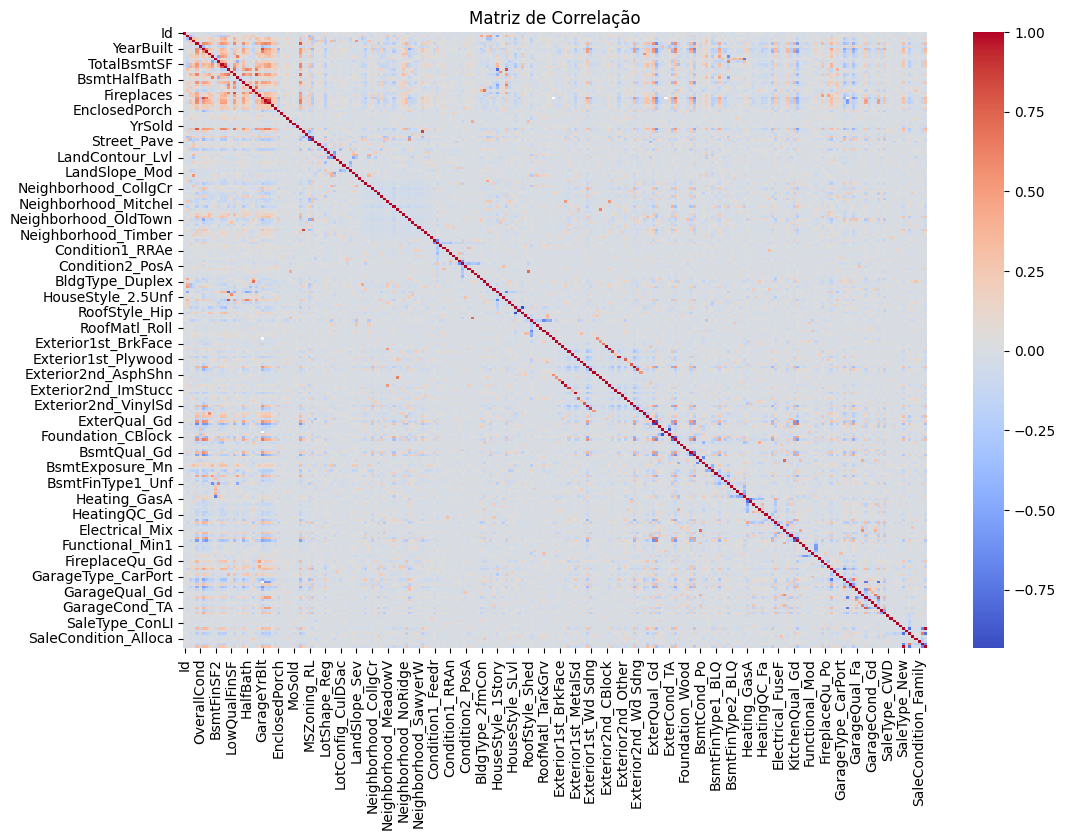

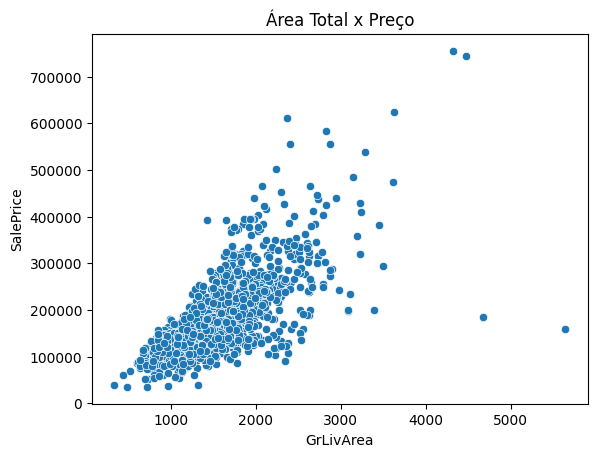

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição dos preços
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribuição dos Preços de Venda')
plt.show()

# Correlação entre variáveis
corr_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação')
plt.show()

# Relação entre área total e preço
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('Área Total x Preço')
plt.show()


### 5. Criação do Modelo

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Separando features e target
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Dividindo em treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")


RMSE: 29483.044483041245


### 6.Ajustando e Enviando as Previsões

In [ ]:
# Ajuste de hiperparâmetros (exemplo simples)
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X, y)

# Garantir que as colunas do conjunto de teste correspondam às do treino
test = test.reindex(columns=X.columns, fill_value=0)


# Gerando previsões para o conjunto de teste
test_predictions = model.predict(test)

# Salvando submissão
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

### Resultado
Resultado: 0.16310

### 7. Feature Enginnering Refinado

In [10]:
# Criando novas features baseadas na intuição
train['TotalPorchSF'] = (
    train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] +
    train['ScreenPorch'] + train['WoodDeckSF']
)

train['Age'] = 2024 - train['YearBuilt']  # Idade da casa
train['RemodAge'] = 2024 - train['YearRemodAdd']  # Tempo desde a última reforma

# Removendo outliers identificados anteriormente
train = train[(train['GrLivArea'] < 4500)]


### 8. Treinamento um Modelo XGBoost

In [11]:
import xgboost as xgb

# Preparando os dados novamente
X = train.drop('SalePrice', axis=1)
y = np.log1p(train['SalePrice'])  # Log-transform

# Treinando o modelo
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### 9. Validação com Cross-Validation

In [12]:
from sklearn.model_selection import cross_val_score

# Validação cruzada para avaliar RMSLE
scores = cross_val_score(
    xgb_model, X, y, cv=5, scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-scores)
print(f"RMSLE médio: {rmse_scores.mean():.5f}")


RMSLE médio: 0.12021


### 10. Combinação de Modelos com Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Modelos base
estimators = [
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42)),
    ('rf', RandomForestRegressor(random_state=42, n_estimators=200))
]

# Modelo empilhado
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=1.0)
)

stack_model.fit(X, y)


StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra..._bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('rf',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=42))],
                  final_estimator=Ridge())

### 11. Nova previsão e submissão

In [15]:
# Garantir que as colunas do conjunto de teste correspondam às do treino
test = test.reindex(columns=X.columns, fill_value=0)

# Gerando previsões com o modelo empilhado
test['SalePrice'] = np.expm1(stack_model.predict(test))

# Salvando para submissão
submission = test[['Id', 'SalePrice']]
submission.to_csv('submission_stack.csv', index=False)


### Resultado
Resultado: 0.17582
